#Libraries Installation and Import

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-segmentation

     |████████████████████████████████| 3.3 MB 7.3 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29071 sha256=8fbd34ef097bcfabdfbf7684af79522603e975c8caec5bc20aaee8b1f182f128
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
!pip install segmentation_models

     |████████████████████████████████| 50 kB 7.6 MB/s 


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
import imgaug as ia
from imgaug import augmenters as iaa
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

from segmentation_models import Unet
from segmentation_models.utils import set_trainable
from keras.preprocessing.image import ImageDataGenerator

Segmentation Models: using `keras` framework.


In [ ]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path

# Image processing
import imageio
import cv2
import skimage.transform
#from skimage.transform import rescale, resize, downscale_local_mean
# Charts
import matplotlib.pyplot as plt
import seaborn as sns

# ML, statistics
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Tensorflow
#from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception 

from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
!pip install tensorflow-addons
!pip install tensorflow-Ranking
import tensorflow_ranking as tfr
import tensorflow_addons as tfa
import tensorflow_probability as tfp

from tensorflow.keras.utils import plot_model

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 141 kB 5.3 MB/s 
     |████████████████████████████████| 462 kB 51.0 MB/s 


In [ ]:
import os
import skimage.io as io
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from torch.utils.data import Dataset, DataLoader
import cv2
import glob
import numpy
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import sklearn.externals
import joblib

In [ ]:
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

In [13]:
from skimage.segmentation import mark_boundaries

#Path to Drive 

In [7]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03')

##Unzipping the Provided Data

In [ ]:
import sys
import zipfile

#Unzipping the dataset
#zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/A3_Dataset.zip", "r")
#zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03')
#zip_ref.close()


#Data Loading and Visualzation

In [8]:
test_label_dir=os.path.join('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/A3_Dataset/dataset1/annotations_prepped_test')
train_image_dir=os.path.join('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/A3_Dataset/dataset1/images_prepped_train')
train_label_dir=os.path.join('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/A3_Dataset/dataset1/annotations_prepped_train')
test_image_dir=os.path.join('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/A3_Dataset/dataset1/images_prepped_test')

In [9]:
train_image = [os.path.join(train_image_dir,fname) for fname in os.listdir(train_image_dir)[:]]
train_label = [os.path.join(train_label_dir,fname) for fname in os.listdir(train_label_dir)[:]]
test_image = [os.path.join(test_image_dir,fname) for fname in os.listdir(test_image_dir)[:]]
test_label = [os.path.join(test_label_dir,fname) for fname in os.listdir(test_label_dir)[:]]

image_size = (224,224)

#function to load data
def open_image(img):
    return np.array(Image.open(img).resize(image_size, Image.NEAREST))

train_images = np.stack([open_image(i) for i in train_image])
train_labels = np.stack([open_image(i) for i in train_label])
test_images = np.stack([open_image(i) for i in test_image])
test_labels = np.stack([open_image(i) for i in test_label])

<function matplotlib.pyplot.show>

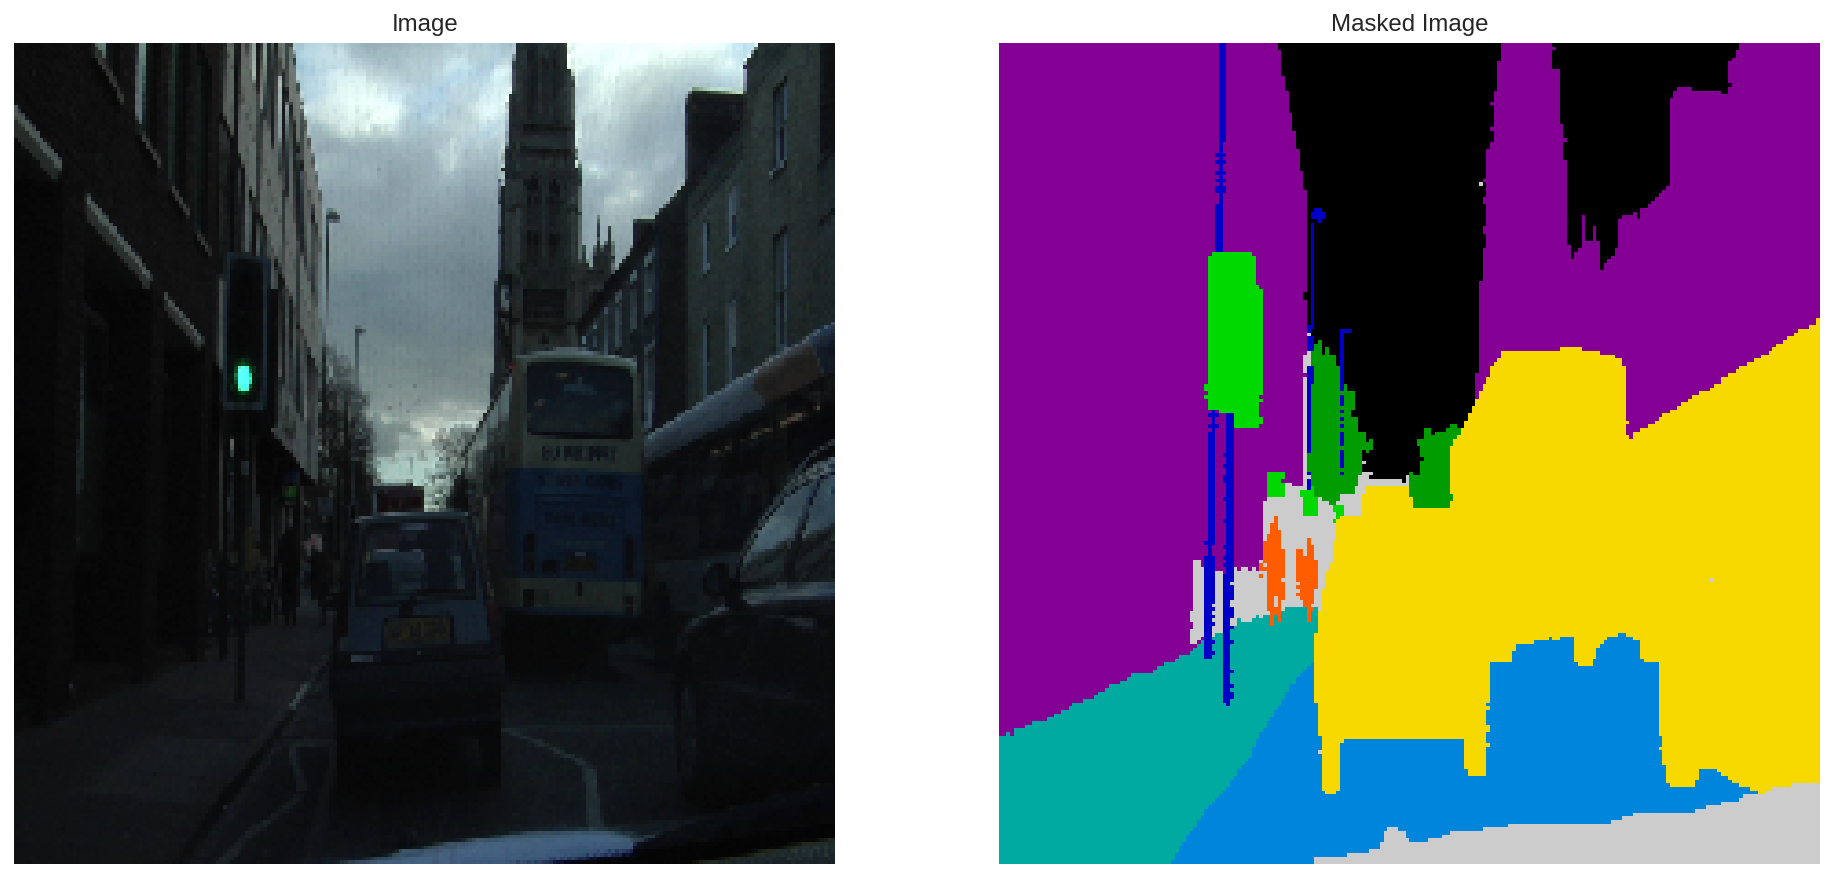

In [ ]:
plt.figure(figsize = (25,25))

image= train_images[0]
mask= train_labels[0]


#plotting image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='nipy_spectral')
plt.axis('off')
plt.title('Masked Image')
plt.show

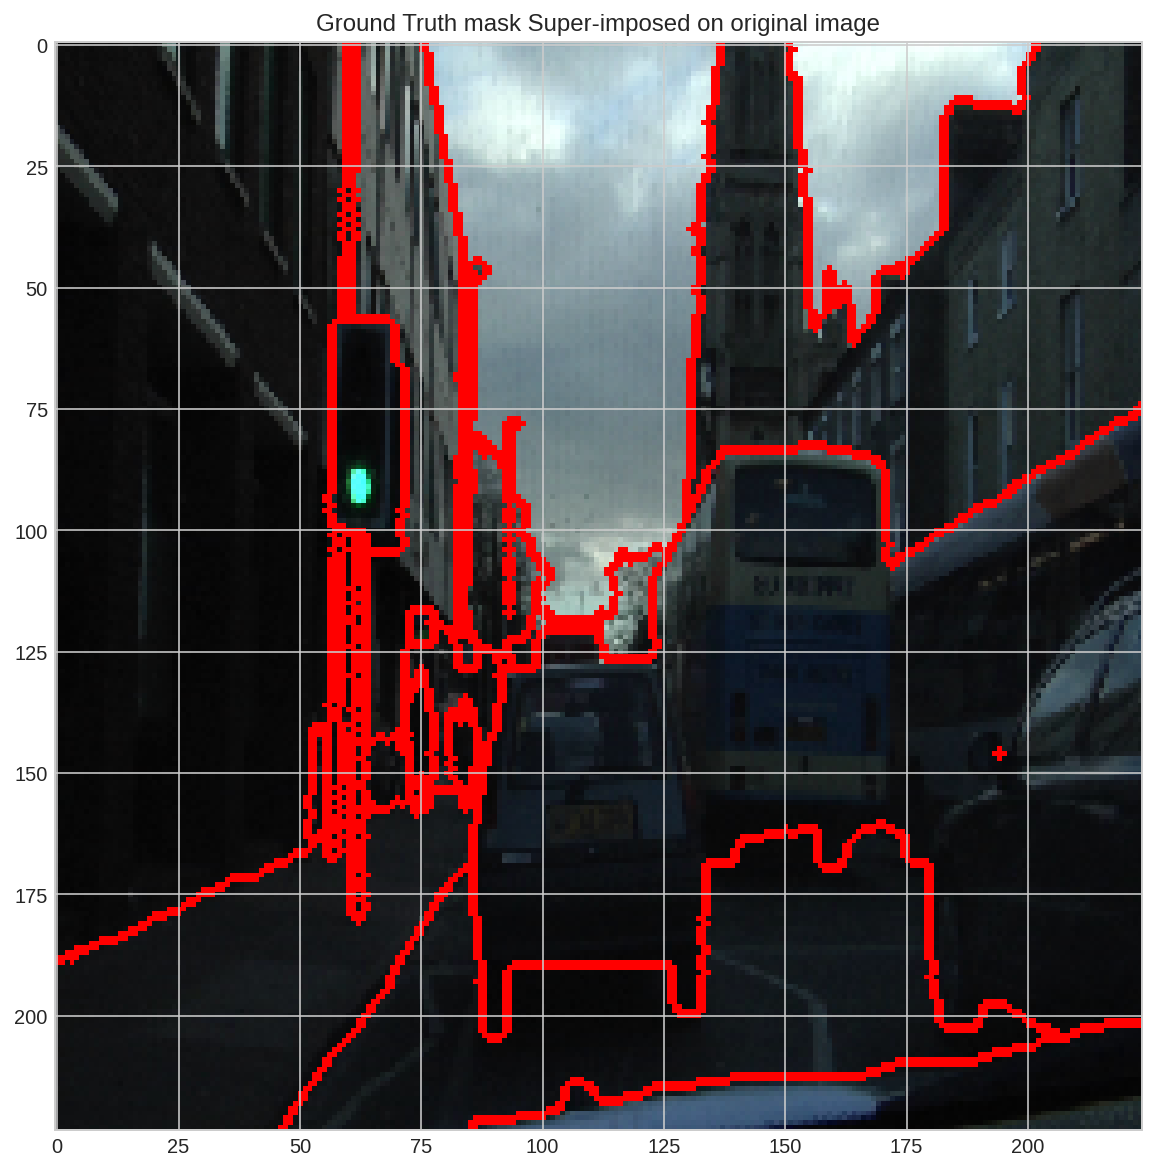

In [ ]:
plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(image, mask,color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth mask Super‐imposed on original image')
plt.show()

#Unet_Resnet50 Model with Transfer Learning
## Using imagenet pre-trained encoder for Resnet50 backbone of Unet Model and training the decoder part for our images

In [ ]:
model = Unet(backbone_name='resnet50', classes=12, encoder_weights='imagenet', encoder_freeze=True)
model.compile('Adam', loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])

94601216/94592056 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

### Only 9,060,239 params being trained out of 32,562,709

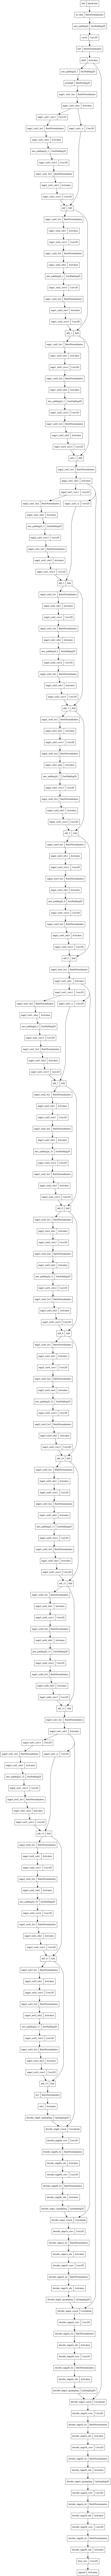

In [ ]:
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/Unet_Resnet50_model.png')

#Data Augmentation and DataLoaders

In [ ]:
PATH='/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/A3_Dataset/dataset1/'

In [ ]:
TARGET_SIZE = (224,224)
BATCH_SIZE = 6

def create_augmentation_pipeline():
    augmentation_pipeline = A.Compose(
    [
        A.HorizontalFlip(p = 0.5), # Apply horizontal flip to 50% of images
        A.OneOf(
            [
                # Apply one of transforms to 50% of images
                A.RandomContrast(), # Apply random contrast
                A.RandomGamma(), # Apply random gamma
                A.RandomBrightness(), # Apply random brightness
            ],
            p = 0.5 
        ),
        A.OneOf(
            [
                # Apply one of transforms to 50% images
                A.ElasticTransform(
                    alpha = 120,
                    sigma = 120 * 0.05,
                    alpha_affine = 120 * 0.03
                ),
                A.GridDistortion()
            ],
            p = 0.5 
        )
    ],
    p = 0.9 # In 10% of cases keep same image because that's interesting also
    )   
    return augmentation_pipeline
  
def create_datagenerator(PATH):
    options = {'horizontal_flip': True, 'vertical_flip': True}
    image_datagen = ImageDataGenerator(rescale=1./255, **options)
    mask_datagen = ImageDataGenerator(**options)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen_mask = ImageDataGenerator(rescale=1)
    
    # Create custom zip and custom batch_size
    def combine_generator(gen1, gen2, batch_size=6,training=True):
        while True:
            image_batch, label_batch = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
            image_batch, label_batch = np.expand_dims(image_batch,axis=0), np.expand_dims(label_batch,axis=0)

            for i in range(batch_size - 1):
                image_i,label_i = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
              
                if training == True:
                    aug_pipeline = create_augmentation_pipeline()
                    augmented = aug_pipeline(image=image_i, mask=label_i)
                    image_i, label_i = augmented['image'], augmented['mask']

                image_i, label_i = np.expand_dims(image_i,axis=0),np.expand_dims(label_i,axis=0)
                image_batch = np.concatenate([image_batch,image_i],axis=0)
                label_batch = np.concatenate([label_batch,label_i],axis=0)
              
            yield((image_batch,label_batch))


    seed = np.random.randint(0,1e5)

    train_image_generator = image_datagen.flow_from_directory(PATH+'images_prepped_train', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    train_mask_generator = mask_datagen.flow_from_directory(PATH+'annotations_prepped_train', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    train_generator = combine_generator(train_image_generator, train_mask_generator,training=True)
    
    val_image_generator = val_datagen.flow_from_directory(PATH+'images_prepped_test', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    val_mask_generator = val_datagen_mask.flow_from_directory(PATH+'annotations_prepped_test', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    val_generator = combine_generator(val_image_generator, val_mask_generator,training=False)
    
    return train_generator, val_generator

In [ ]:
seed=24
img_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

labels_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect') 

image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(train_images, augment=True, seed=seed)

image_generator = image_data_generator.flow(train_images, seed=seed)
valid_img_generator = image_data_generator.flow(test_images, seed=seed)
tr_labels=train_labels.reshape(468, 224, 224,1)
ts_labels=test_labels.reshape(101, 224, 224,1)
mask_data_generator = ImageDataGenerator(**labels_data_gen_args)
mask_data_generator.fit(tr_labels+(1,), augment=True, seed=seed)

mask_generator = mask_data_generator.flow(tr_labels, seed=seed)
valid_mask_generator = mask_data_generator.flow(ts_labels, seed=seed)

def img_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

tr_gen = img_generator(image_generator, mask_generator)

val_gen = img_generator(valid_img_generator, valid_mask_generator)

#Function to train the model

In [ ]:
def train_model(model, gen1, gen2, typeModel):
       
        epochs=20
        batch_size=32
        steps_per_epoch= 4*(len(train_images))//batch_size
            
        # We'll stop training if no improvement after some epochs
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
        
        # Save the best model during the traning
        checkpointer = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/model' + str(typeModel) +'.h5'
                                        ,verbose=1
                                        ,save_weights_only=True)
        # Train
        training = model.fit_generator(generator=gen1
                                ,epochs=epochs
                                ,validation_data=gen2
                                ,steps_per_epoch=steps_per_epoch
                                ,validation_steps=steps_per_epoch
                                ,callbacks=[checkpointer, reduce_lr])
        joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/model_' + str(typeModel) +'.pkl', compress=1)
        joblib.dump(training, '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/training_' + str(typeModel) +'.pkl', compress=1)
        return training

In [ ]:
typeModel='Unet_Resnet50'
trainer1 = train_model(model, tr_gen, val_gen, typeModel)
print("Unet_Resnet50 Trained")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
58/58 [==============================] - ETA: 0s - loss: -9.0272 - iou_score: 1.8682 - Accuracy: 0.0040
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/modelUnet_Resnet50.h5
58/58 [==============================] - 86s 1s/step - loss: -9.0272 - iou_score: 1.8682 - Accuracy: 0.0040 - val_loss: -28.5067 - val_iou_score: 1.7552 - val_Accuracy: 0.1080 - lr: 0.0010
Epoch 2/15
58/58 [==============================] - ETA: 0s - loss: -34.6202 - iou_score: 2.5033 - Accuracy: 0.1599
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/modelUnet_Resnet50.h5
58/58 [==============================] - 58s 1s/step - loss: -34.6202 - iou_score: 2.5033 - Accuracy: 0.1599 - val_loss: -97.1833 - val_iou_score: 2.8376 - val_Accuracy: 0.4586 - lr: 0.0010
Epoch 3/15
58/58 [==============================] - ETA: 0s - loss: -69.3521 - iou_score: 2.7417 - Accuracy: 0.2624
Epoch 3: saving model to /

#Evaluation Class
### To display training curves as well as evaluation metrics for test data

In [ ]:
class Eval:
  
    def __init__(self, model, training, generator, y_true):
        self.training = training
        self.generator = generator

        steps=5
        
        self.y_pred = model.predict(self.generator, steps=steps)
        index_array = np.argmax(self.y_pred, axis=-1)
        self.y_pred=np.take_along_axis(self.y_pred, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
        self.y_true=y_true[:len(self.y_pred)] 

        #print(self.y_pred.shape)

        #print(self.y_true.shape)

    def plot_history(self):

        plt.figure(figsize=(8, 8))
        plt.title("Loss Plot")
        plt.plot(self.training.history["loss"], label="loss")
        plt.plot(self.training.history["val_loss"], label="val_loss")
        plt.plot( np.argmin(self.training.history["val_loss"]), np.min(self.training.history["val_loss"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend();
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.title("Accuracy Plot")
        plt.plot(self.training.history["Accuracy"], label="Accuracy")
        plt.plot(self.training.history["val_Accuracy"], label="val_Accuracy")
        plt.plot( np.argmax(self.training.history["val_Accuracy"]), np.max(self.training.history["val_Accuracy"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend();
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.title("IOU Score Plot")
        plt.plot(self.training.history["iou_score"], label="iou_score")
        plt.plot(self.training.history["val_iou_score"], label="val_iou_score")
        plt.plot( np.argmax(self.training.history["val_iou_score"]), np.max(self.training.history["val_iou_score"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("IOU Score")
        plt.legend();
        plt.show()


    def print_report(self):


        #Dice Coeff
        y_true_f = self.y_true.flatten()
        y_pred_f = np.round(self.y_pred.flatten()).astype(int)
      

        union = np.sum(y_true_f) + np.sum(y_pred_f)
        if union==0: dc= 1
        intersection = np.sum(y_true_f * y_pred_f)
        dc= 2. * intersection / union
        print('Dice Coeff : ', dc)

        print('Accuracy', np.mean(self.training.history["val_Accuracy"]))

        #Confusion matrix, Accuracy, sensitivity and specificity
        cm1 = confusion_matrix(y_true_f, y_pred_f)
        total1=np.sum(cm1)

        sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        print('Sensitivity : ', sensitivity1 )

        specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        print('Specificity : ', specificity1)

        #F1 Score
        f1=f1_score(y_true_f, y_pred_f, average='micro')
        print('F1-Score : ', f1)

        




#Quantitative Analysis

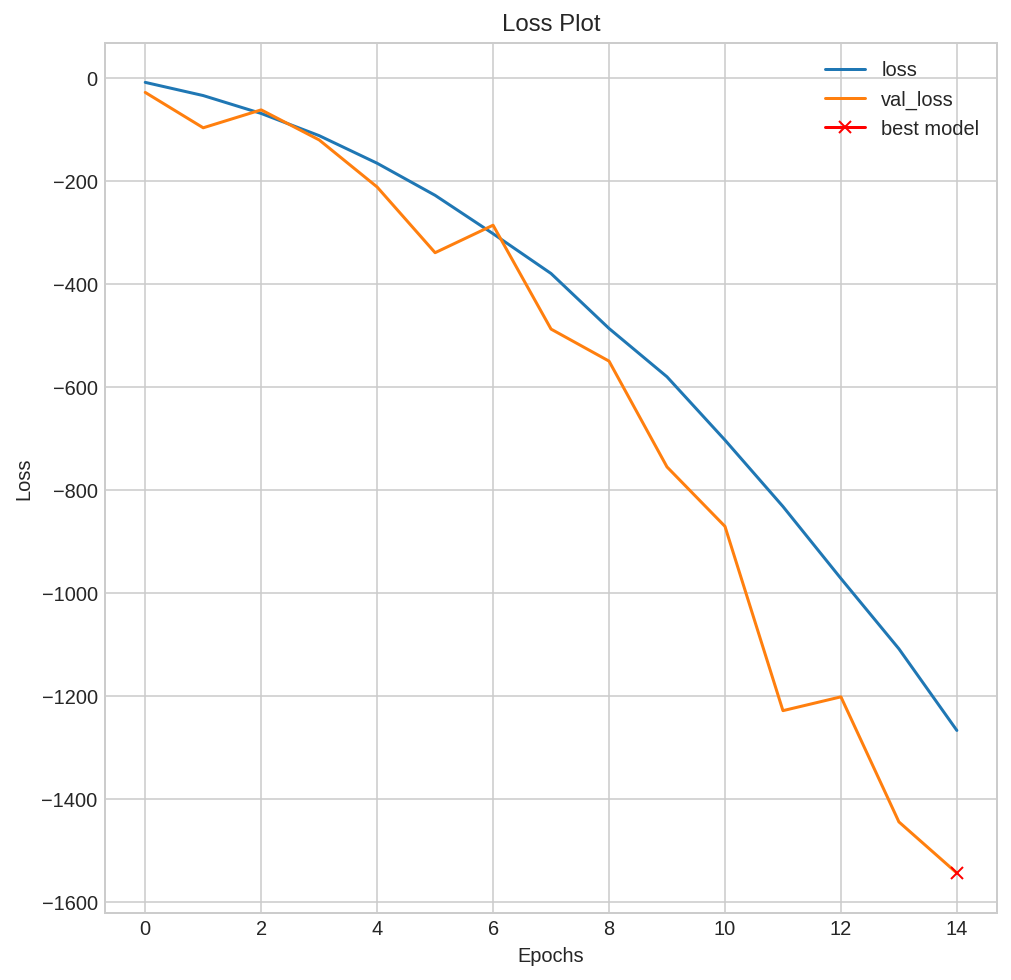

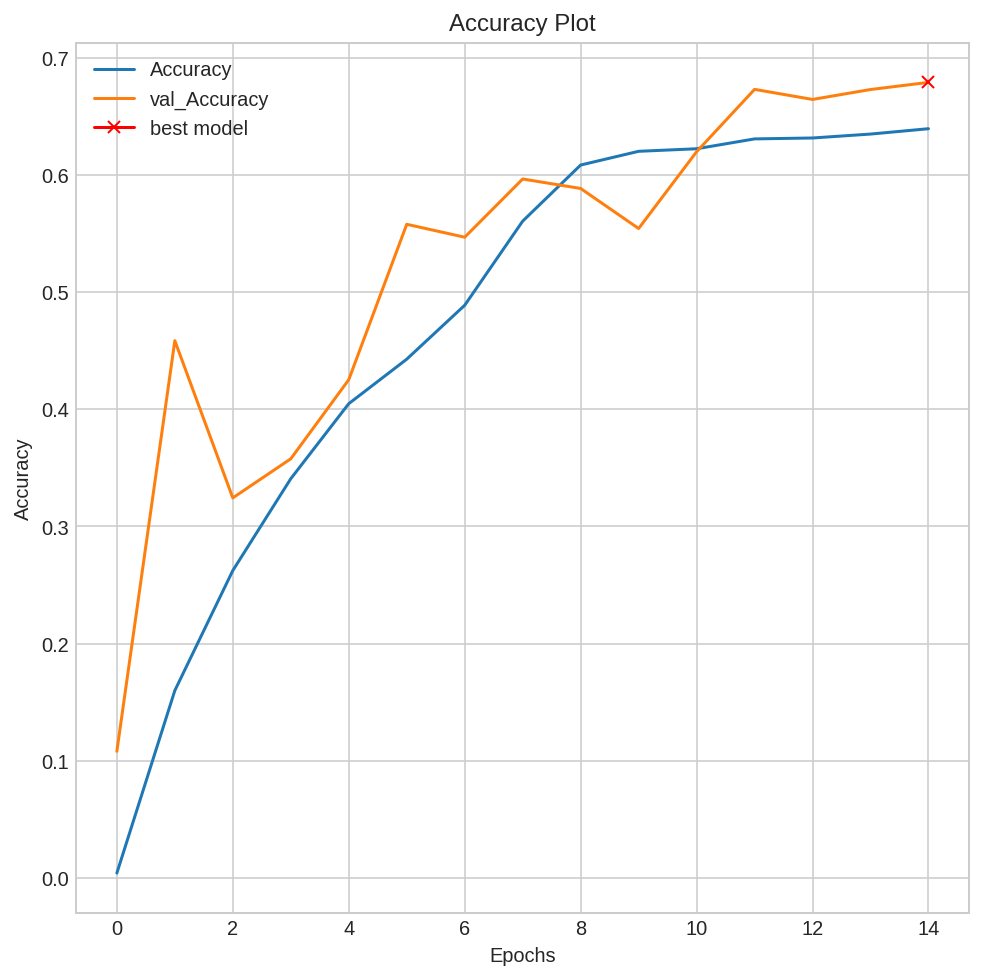

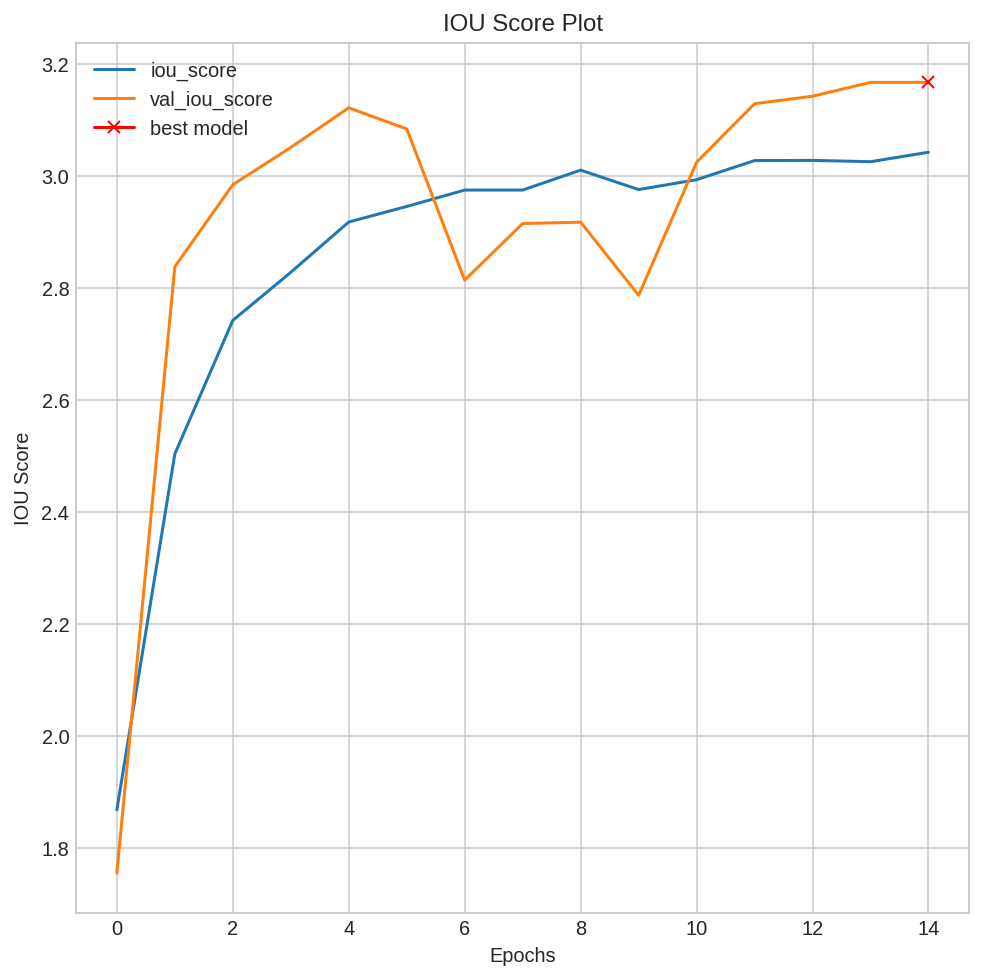

Dice Coeff :  1.5216081849774084
Accuracy 0.5219459940989812
Sensitivity :  0.0
Specificity :  1.0
F1-Score :  0.2596162498105678


In [ ]:
evaluator = Eval(model, trainer1, test_images, test_labels)
evaluator.plot_history()
evaluator.print_report()


#Qualitative Analysis
### Unet_Resnet50 predicted masks for test images and their super-imposed boundaries on test images

<function matplotlib.pyplot.show>

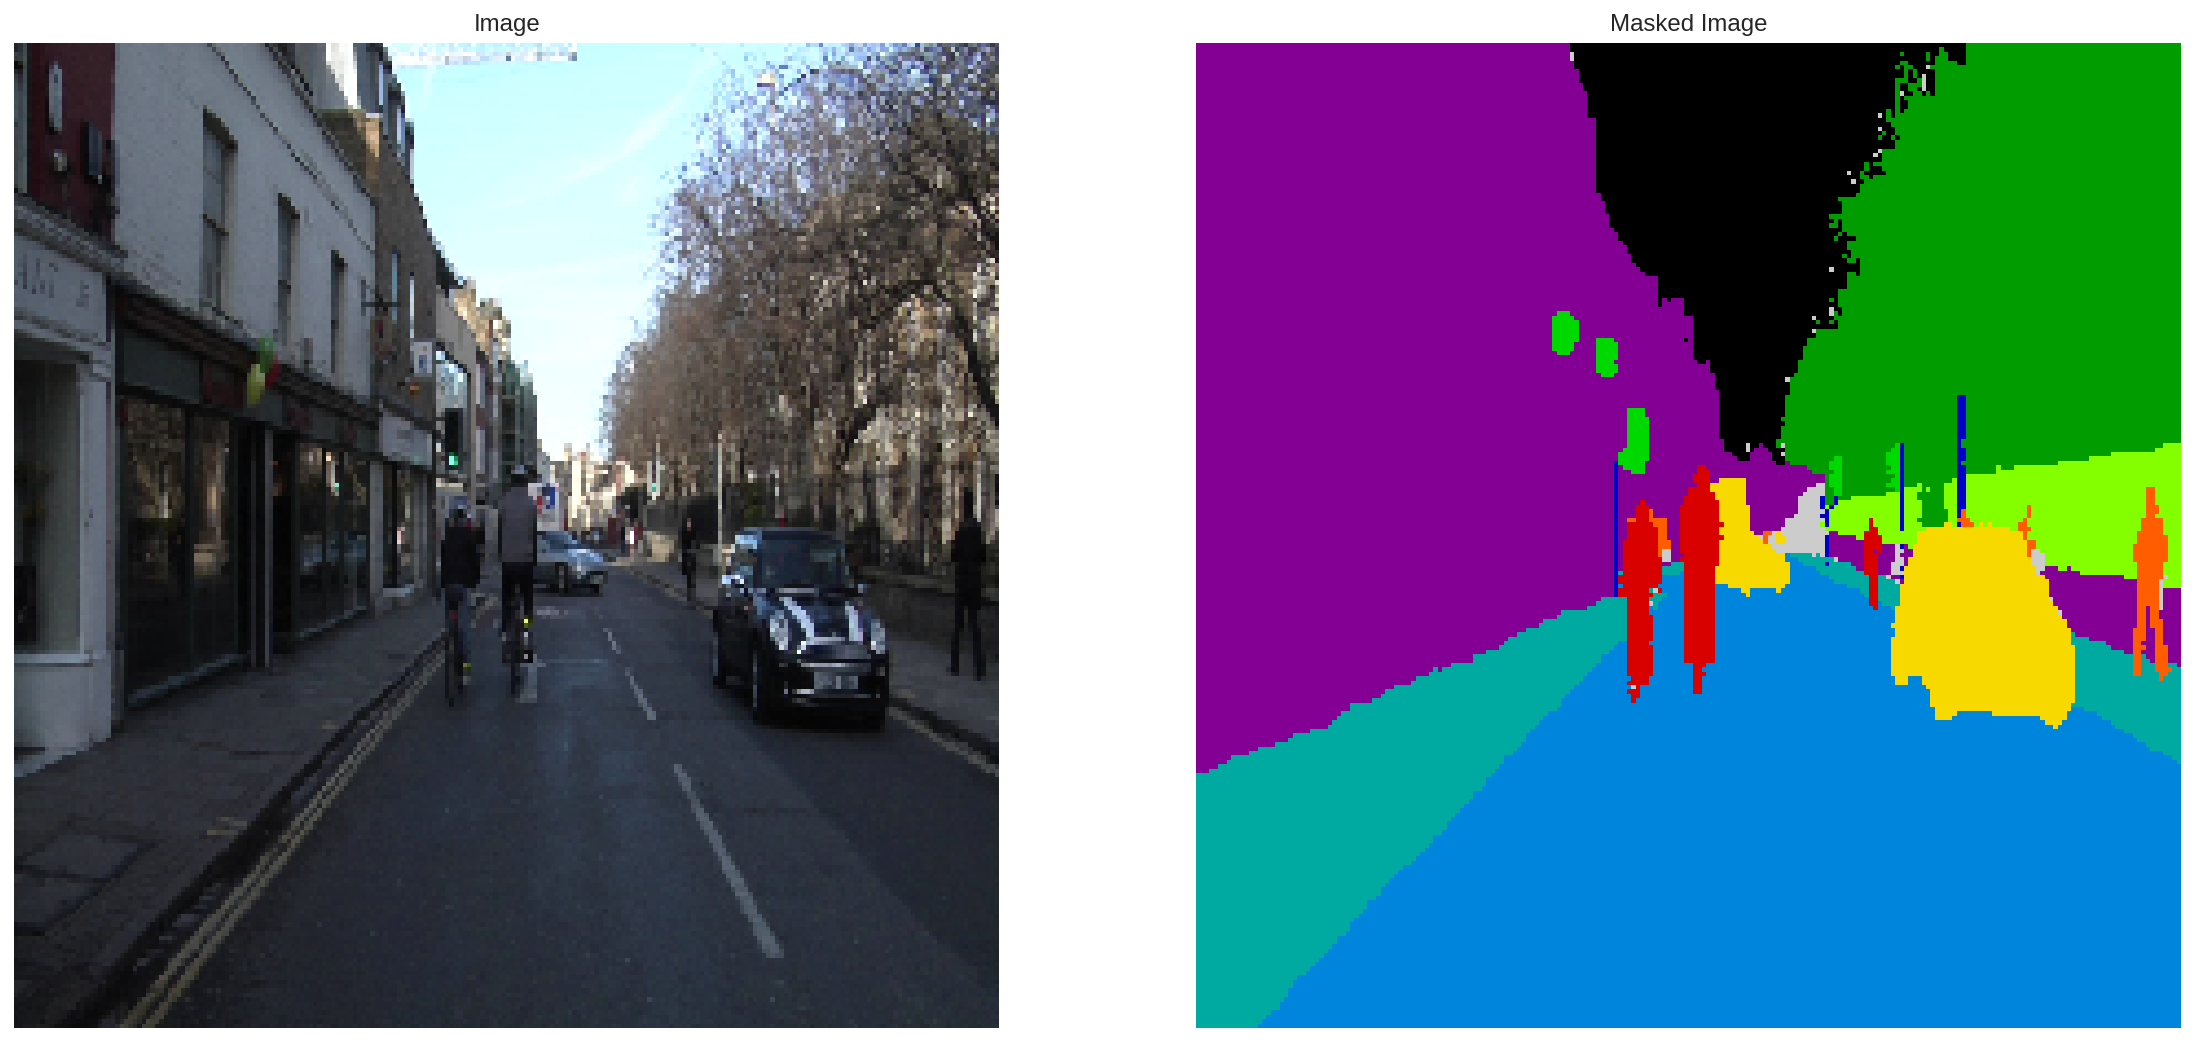

In [ ]:
#Ground Truth Test Image and its mask

plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(test_images[0])
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(test_labels[0], cmap='nipy_spectral')
plt.axis('off')
plt.title('Masked Image')
plt.show

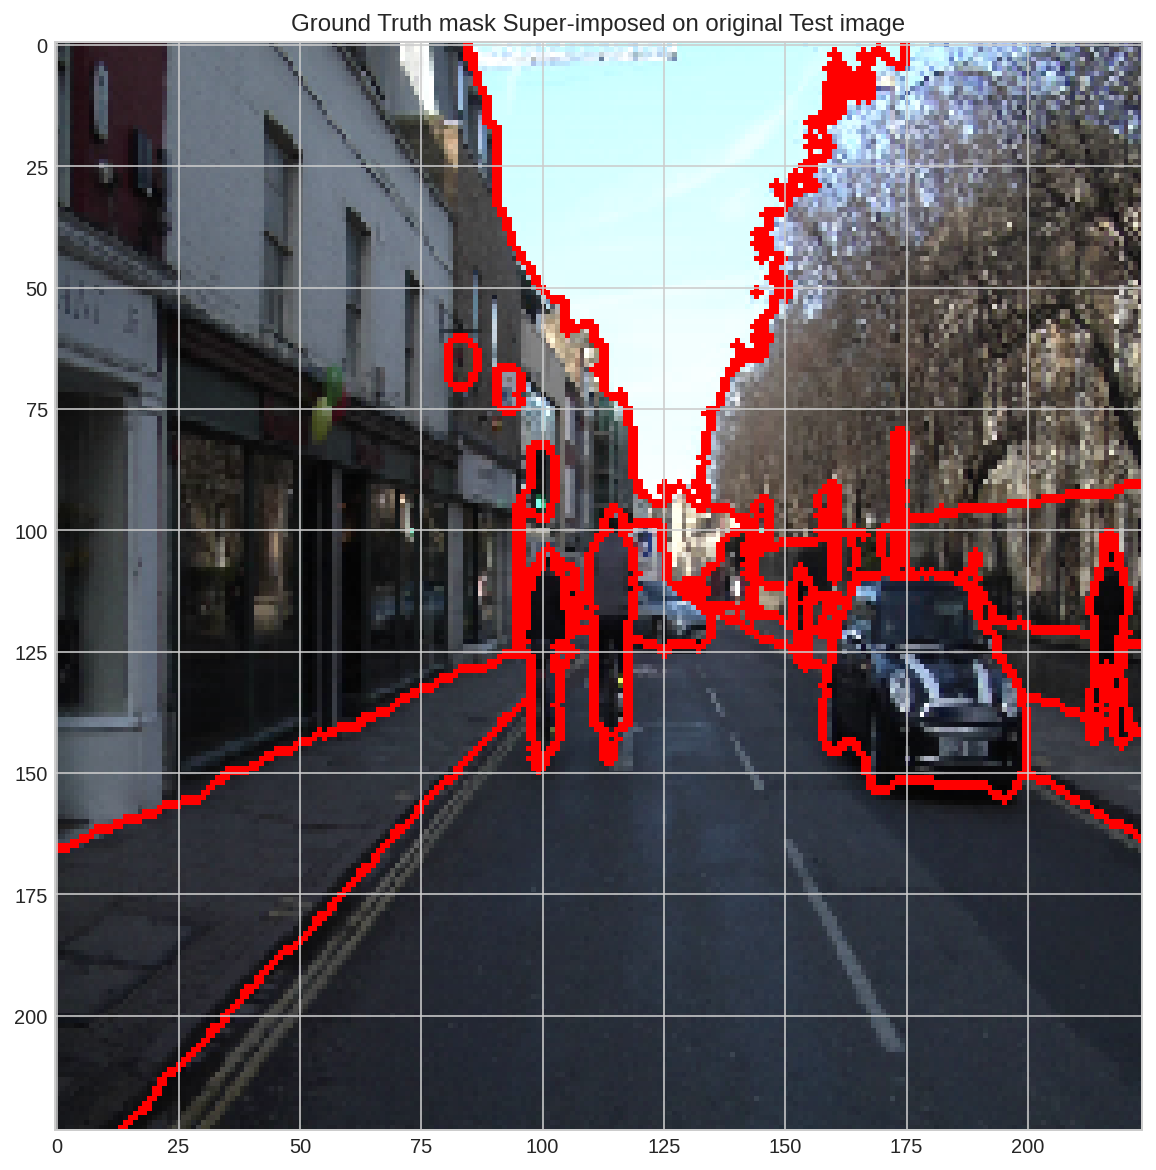

In [ ]:
#Ground truth mask super-imposed on original test image
plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(test_images[0], test_labels[0], color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth mask Super‐imposed on original Test image')
plt.show()

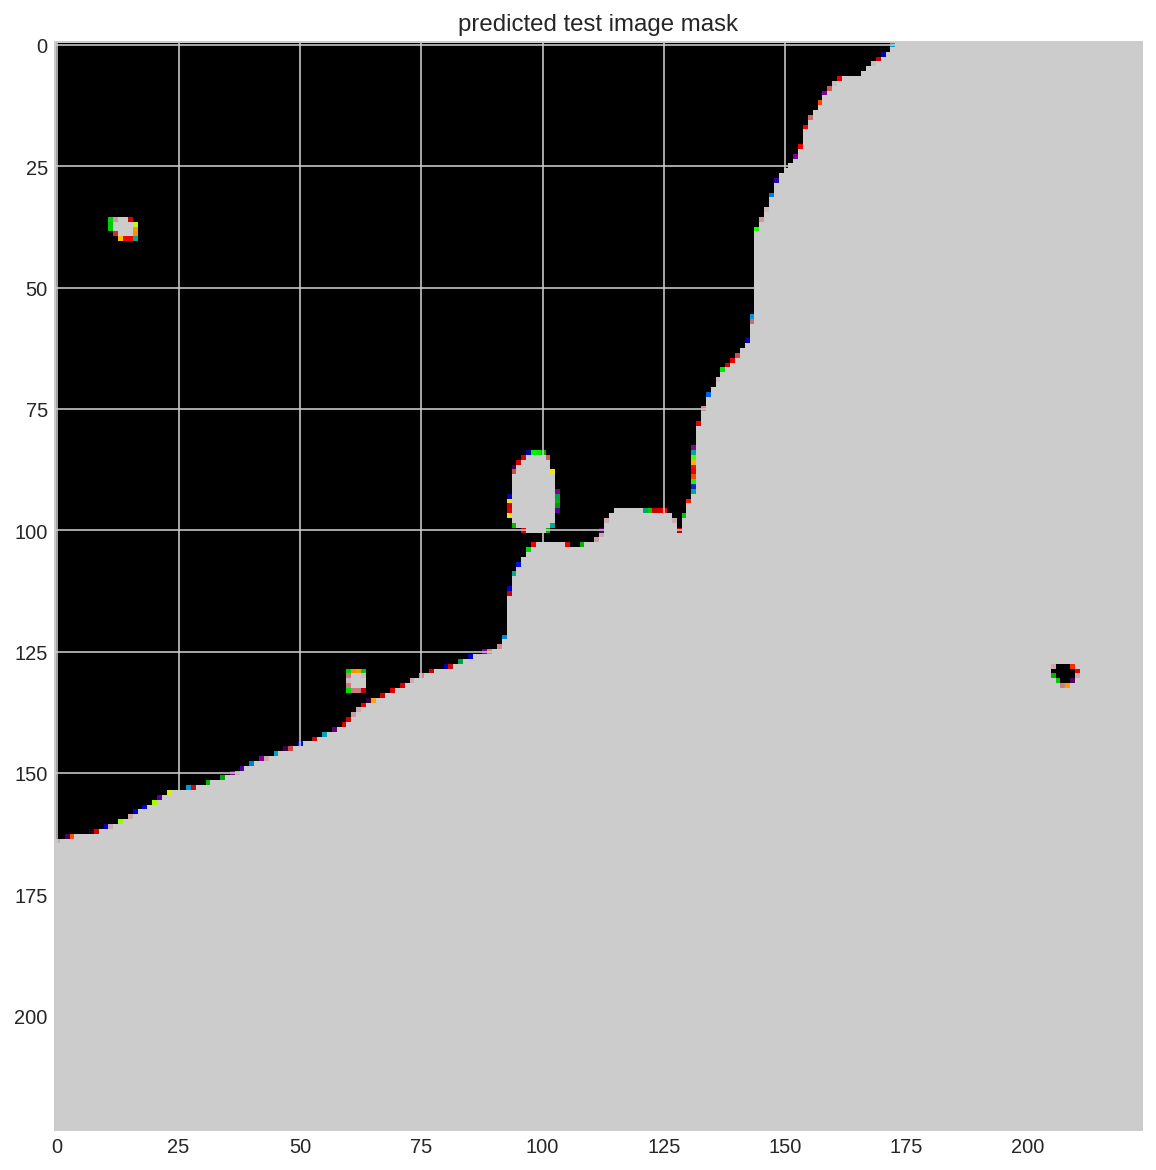

In [ ]:
#Predicted Mask using trained Unet with Resnet50 backbone
plt.figure(figsize=(10,10))
pred_image = model.predict(test_images)
p=pred_image[0]
index_array = np.argmax(p, axis=-1)
p=np.take_along_axis(p, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
plt.imshow(p, cmap='nipy_spectral')
plt.title('predicted test image mask')
plt.show()


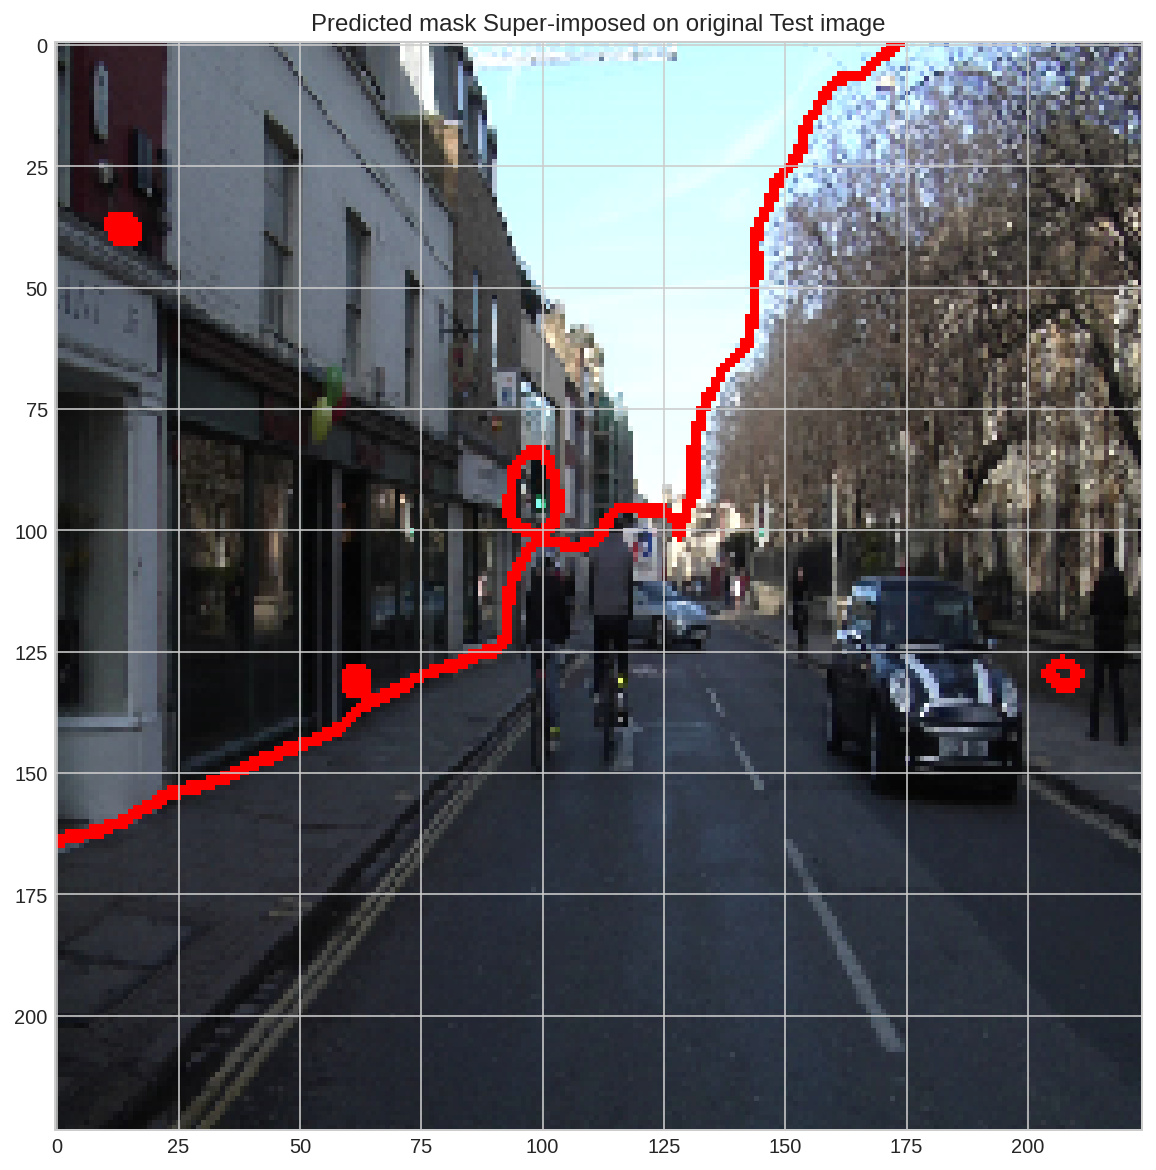

In [ ]:
#Predicted mask super-imposed on the original test image
plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(test_images[0], p, color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Predicted mask Super‐imposed on original Test image')
plt.show()

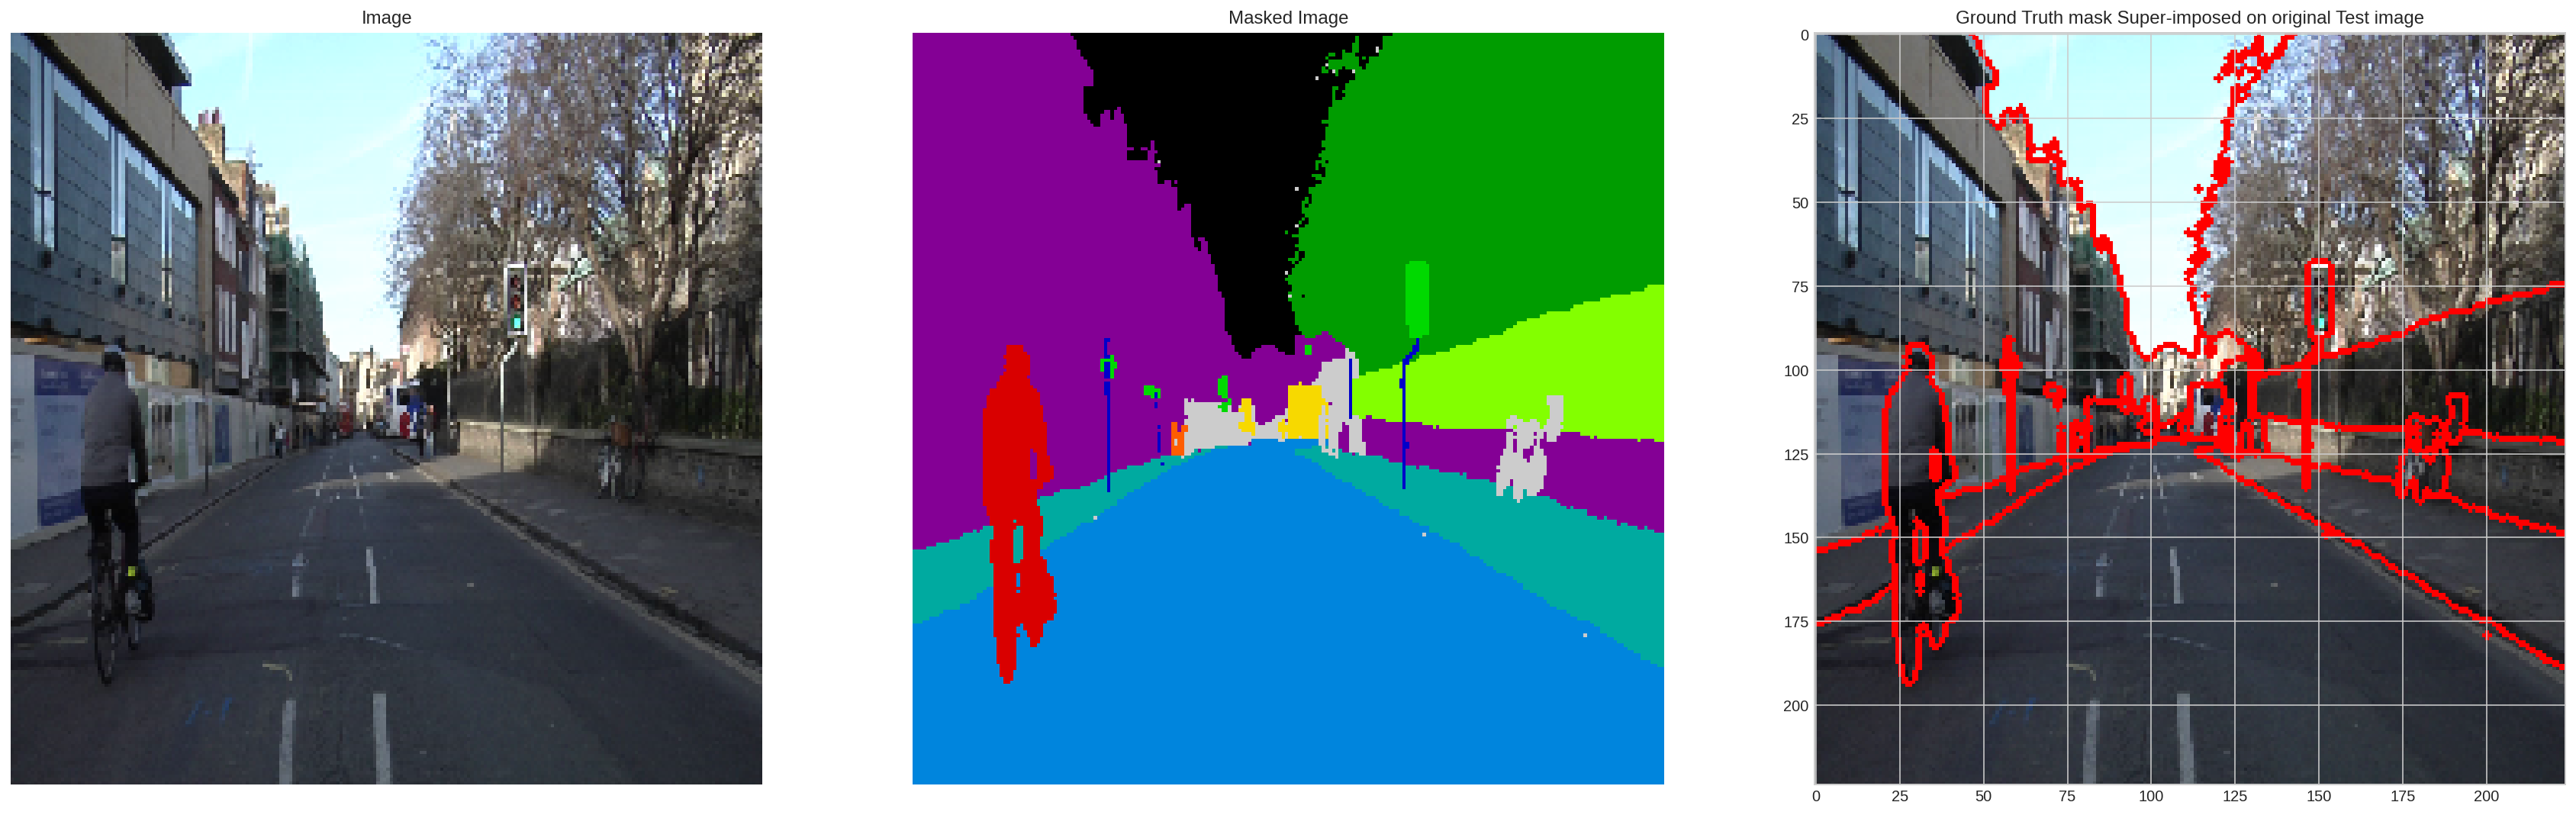

In [ ]:
#Another Ground Truth Test Image and its mask, along with it super-imposed on the test image
plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(test_images[100])
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(test_labels[100], cmap='nipy_spectral')
plt.axis('off')
plt.title('Masked Image')
plt.show


plt.subplot(1, 3, 3)
edges_pz = mark_boundaries(test_images[100], test_labels[100], color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth mask Super‐imposed on original Test image')
plt.show()

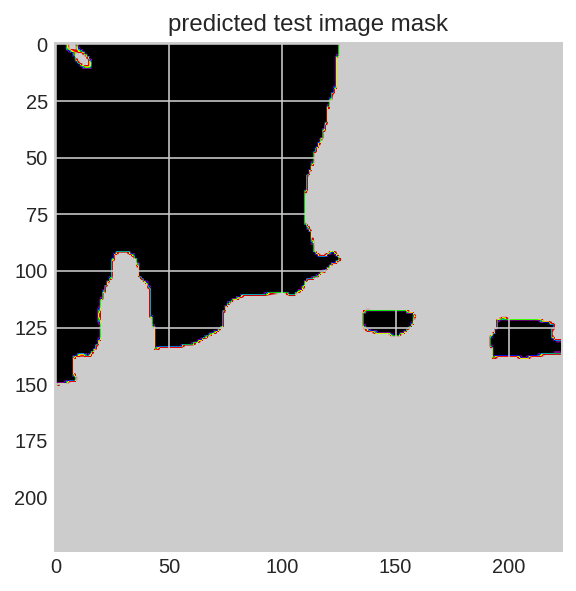

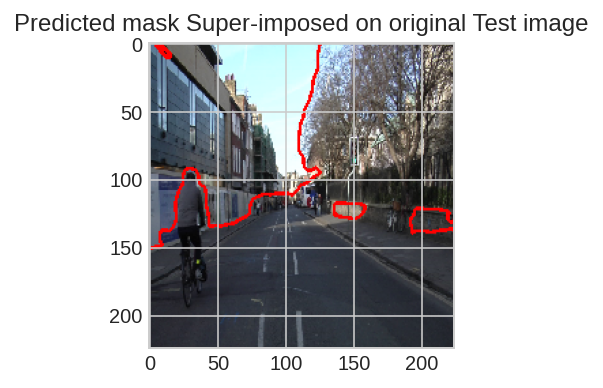

In [ ]:
#Predicted Mask using trained Unet with Resnet50 backbone and its boundaries super-imposed on the original test image

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
pred_image = model.predict(test_images)
p=pred_image[100]
index_array = np.argmax(p, axis=-1)
p=np.take_along_axis(p, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
plt.imshow(p, cmap='nipy_spectral')
plt.title('predicted test image mask')
plt.show()

plt.subplot(1, 2, 2)
edges_pz = mark_boundaries(test_images[100], p, color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Predicted mask Super‐imposed on original Test image')
plt.show()


#Enhancing the used baseline as the 2nd Architecture.

##Unet_EfficientNet Model with Transfer Learning
### Using imagenet pre-trained encoder for EfficientNet backbone of Unet Model and training the decoder part for our images

In [ ]:
model1 = Unet(backbone_name='efficientnetb5', classes=12, encoder_weights='imagenet', encoder_freeze=True)
model1.compile('Adam', loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])

In [ ]:
model1.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 stem_conv (Conv2D)             (None, None, None,   1296        ['input_5[0][0]']                
                                48)                                                               
                                                                                                  
 stem_bn (BatchNormalization)   (None, None, None,   192         ['stem_conv[0][0]']              
                                48)                                                         

### Only  9,127,500 param out of 37,470,268 being trained

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.552228 to fit



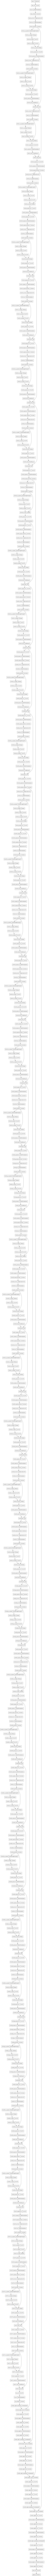

In [ ]:
plot_model(model1, to_file='/content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/Unet_EfficientNet_model.png')

##Training the Unet network with Efficient Net backbone using the Train_Model function 

In [ ]:
typeModel='Unet_EfficientNet'
trainer2 = train_model(model1, tr_gen, val_gen, typeModel)
print("Unet_EfficientNet Trained")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
58/58 [==============================] - ETA: 0s - loss: -7.6769 - iou_score: 1.7468 - Accuracy: 0.3323
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/modelUnet_EfficientNet.h5
58/58 [==============================] - 103s 1s/step - loss: -7.6769 - iou_score: 1.7468 - Accuracy: 0.3323 - val_loss: -101.8708 - val_iou_score: 3.0536 - val_Accuracy: 0.9242 - lr: 0.0010
Epoch 2/20
58/58 [==============================] - ETA: 0s - loss: -32.9540 - iou_score: 2.5169 - Accuracy: 0.3447
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/Computer Vision/Assignments/Assign_03/modelUnet_EfficientNet.h5
58/58 [==============================] - 81s 1s/step - loss: -32.9540 - iou_score: 2.5169 - Accuracy: 0.3447 - val_loss: -23.9984 - val_iou_score: 2.5413 - val_Accuracy: 0.5167 - lr: 0.0010
Epoch 3/20
58/58 [==============================] - ETA: 0s - loss: -66.5206 - iou_score: 2.7589 - Accuracy: 0.3193
Epoch 3: saving 

# Quantitative Analysis of Unet with EfficientNet backbone

## Training and validation plots along with test evaluation metrics using the Eval class above

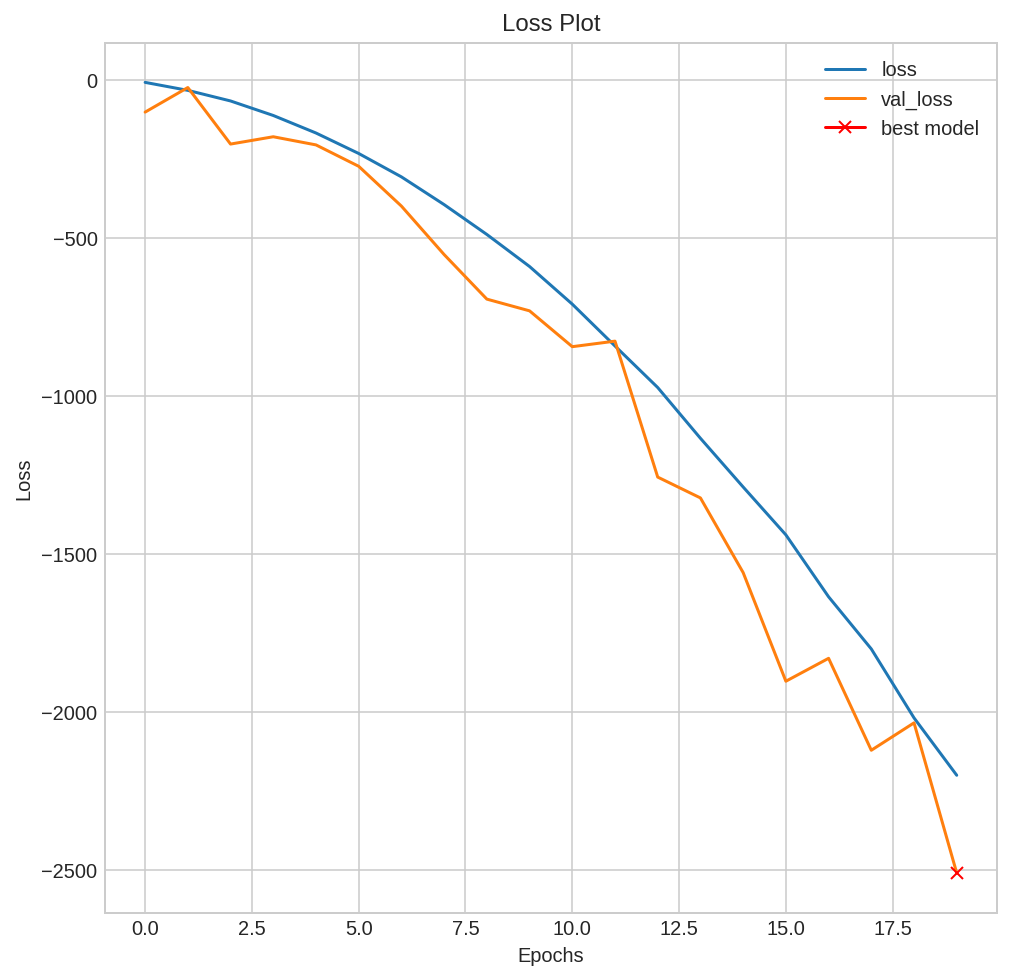

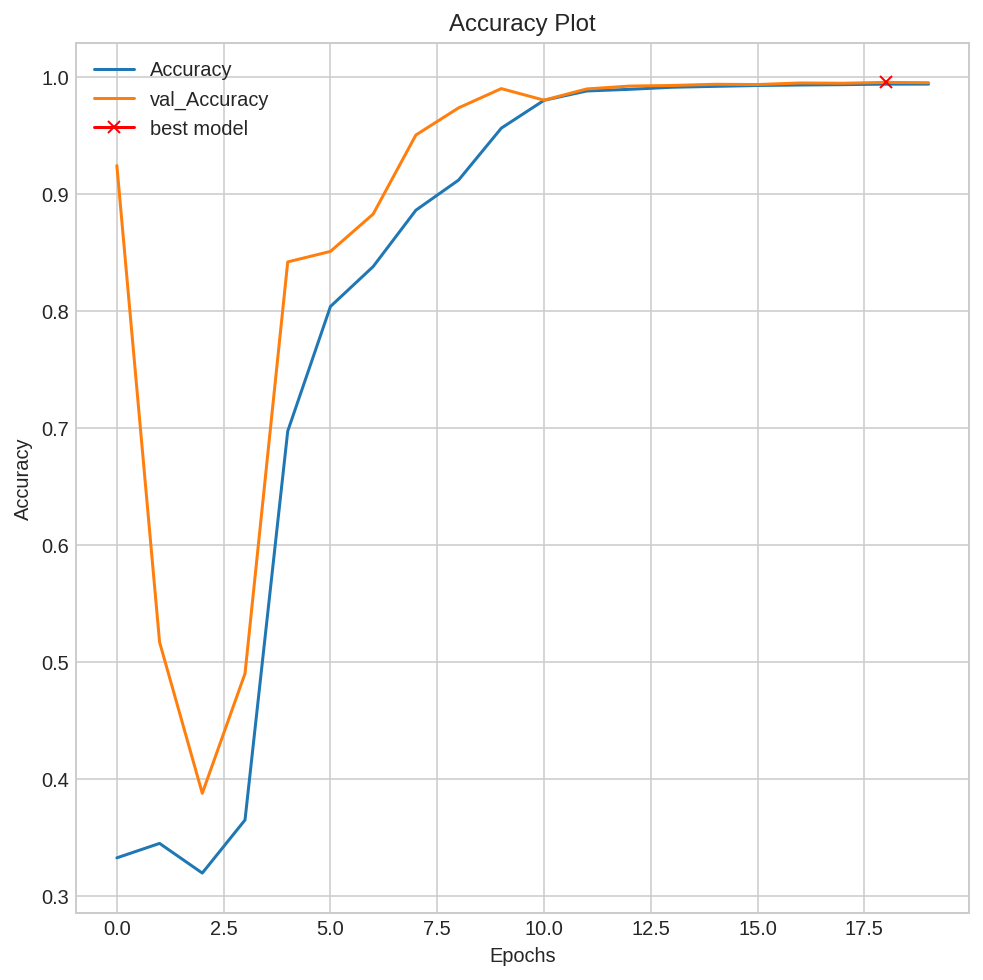

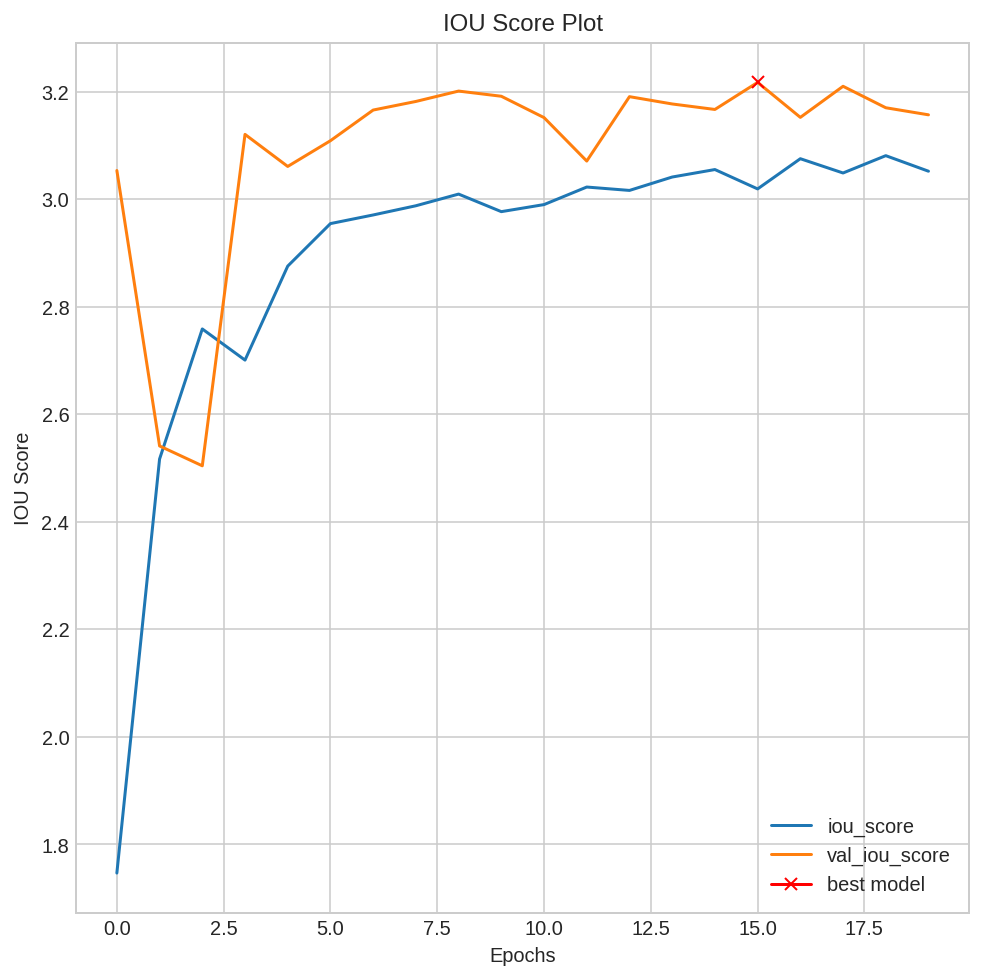

Dice Coeff :  1.5216081849774084
Accuracy 0.8864342734217644
Sensitivity :  0.0
Specificity :  1.0
F1-Score :  0.2596162498105678


In [ ]:
evaluator1 = Eval(model1, trainer2, test_images, test_labels)
evaluator1.plot_history()
evaluator1.print_report()

#Qualitative Analysis


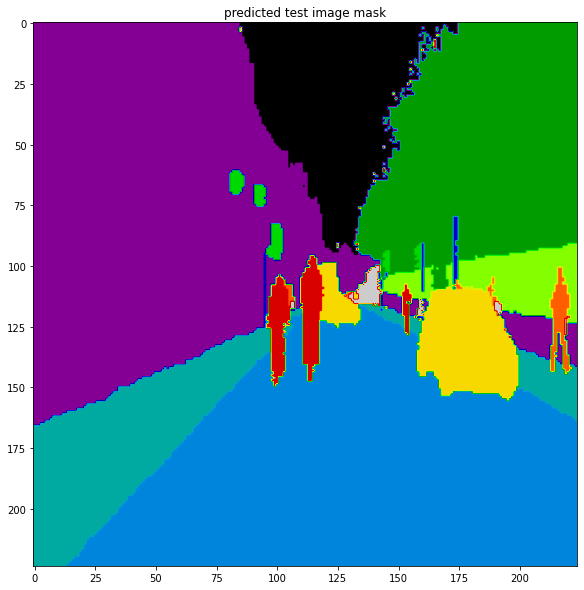

In [11]:
#Predicted mask of test image 0 (original image and ground truth masks already displayed above)
plt.figure(figsize=(10,10))
pred_image1 = model1.predict(test_images)
p1=pred_image1[0]
index_array = np.argmax(p1, axis=-1)
p1=np.take_along_axis(p1, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
plt.imshow(p1, cmap='nipy_spectral')
plt.title('predicted test image mask')
plt.show()


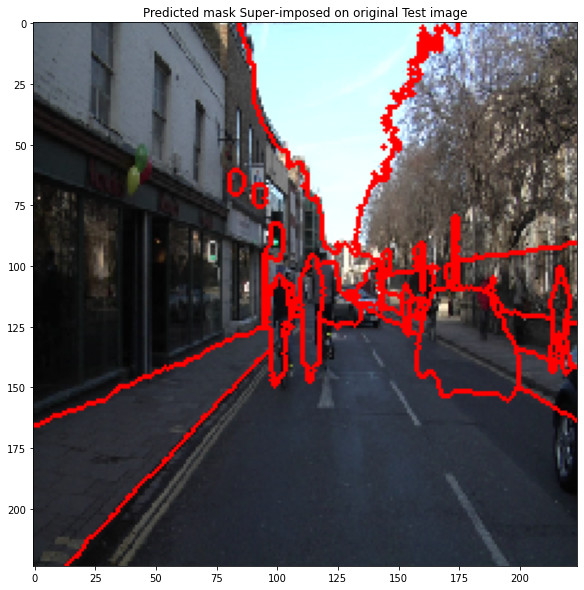

In [14]:
#Predicted mask super-imposed on original image
plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(test_images[0], p1, color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Predicted mask Super‐imposed on original Test image')
plt.show()

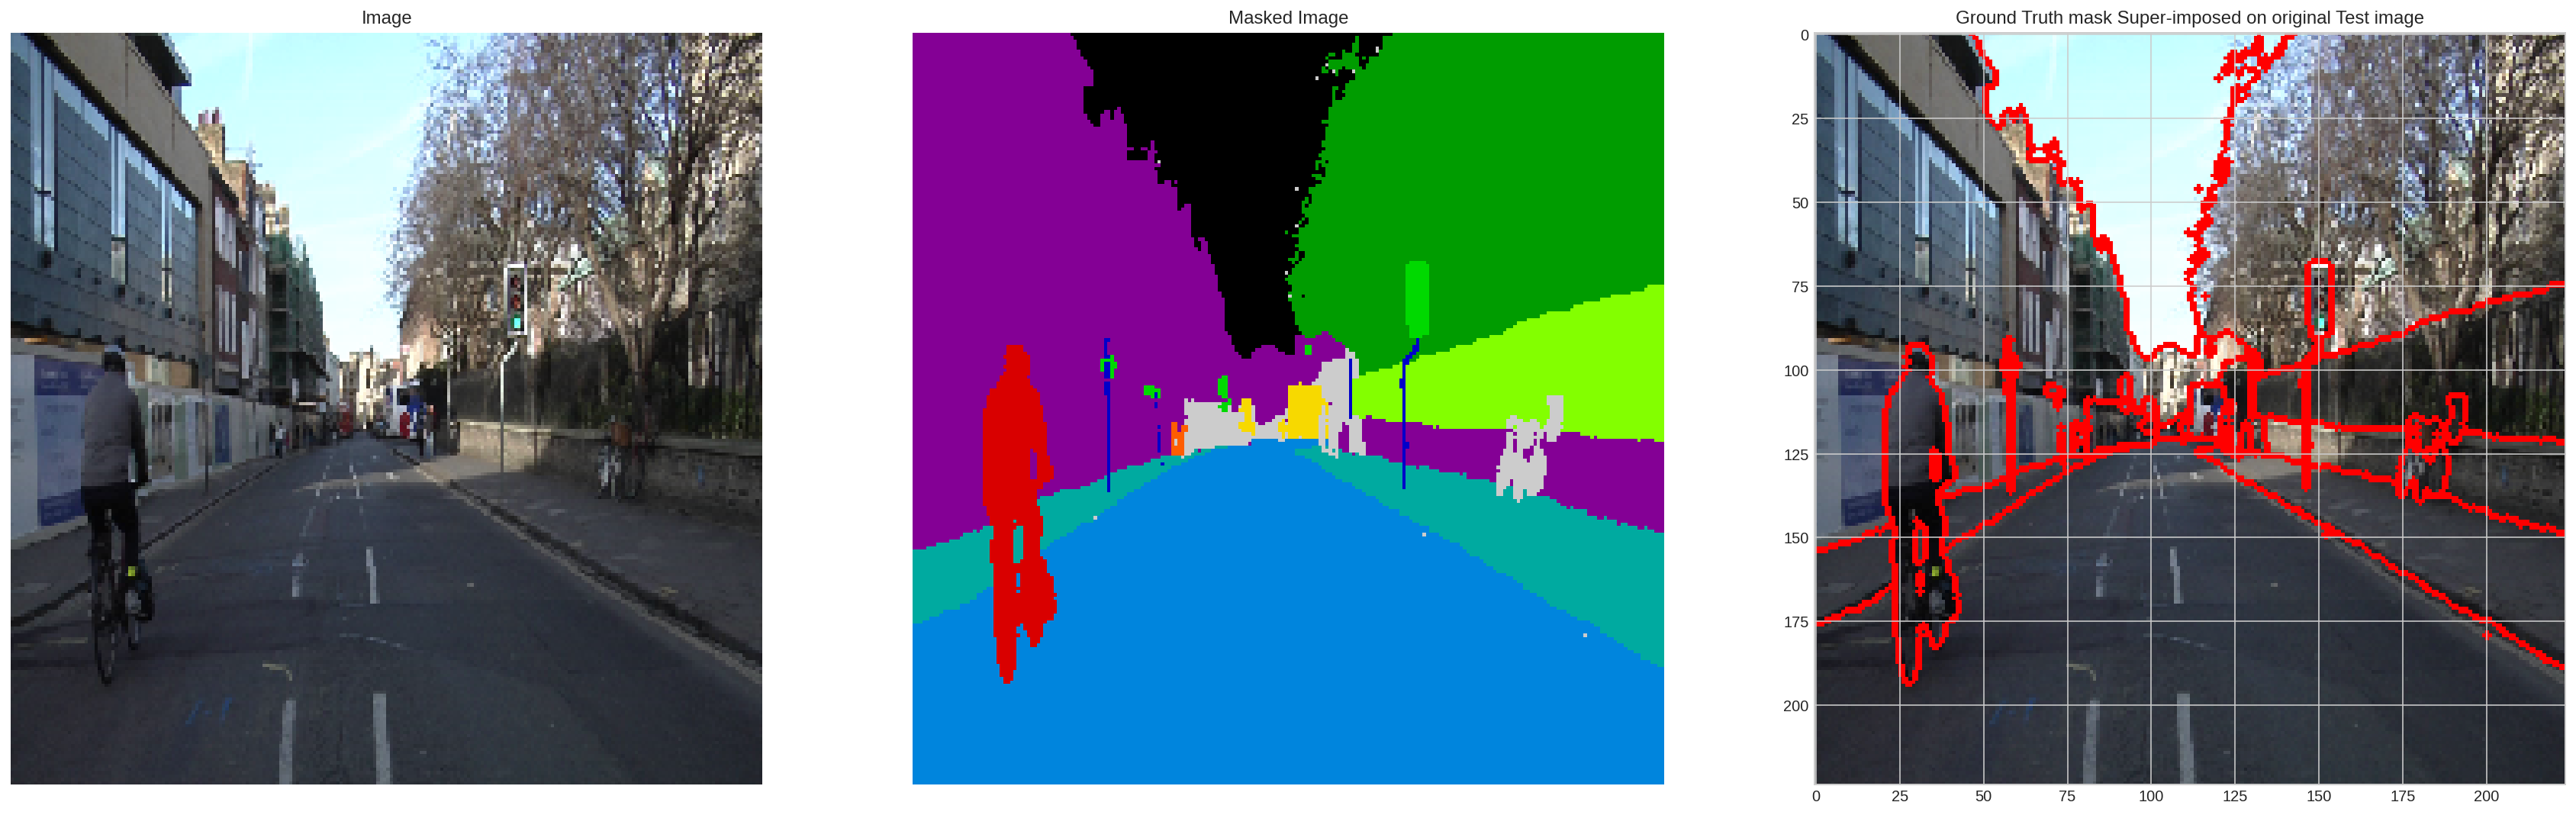

In [ ]:
#Original test image, its mask and super-imposed boundaries on the original image for 100th test image 
plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(test_images[100])
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(test_labels[100], cmap='nipy_spectral')
plt.axis('off')
plt.title('Masked Image')
plt.show


plt.subplot(1, 3, 3)
edges_pz = mark_boundaries(test_images[100], test_labels[100], color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth mask Super‐imposed on original Test image')
plt.show()

<function matplotlib.pyplot.show>

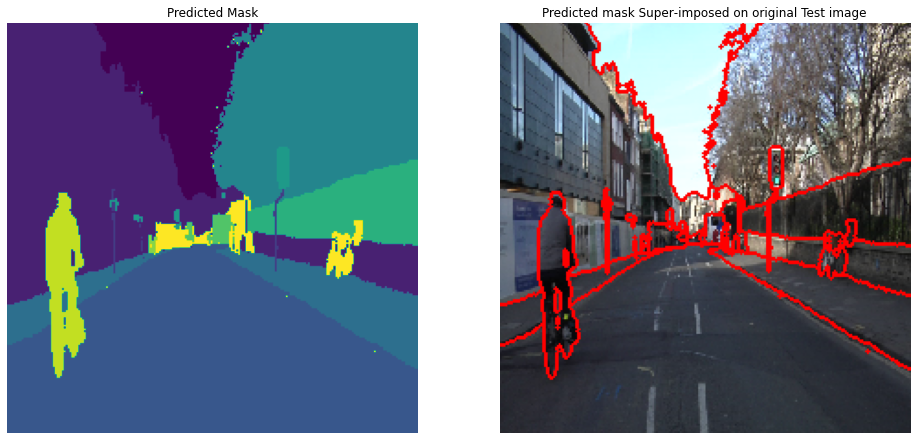

In [19]:
#Predicted mask along with its super-imposed boundaries on original 100th test image 
plt.figure(figsize = (25,25))
pred_image = model1.predict(test_images)
p=pred_image[100]
index_array = np.argmax(p, axis=-1)
p=np.take_along_axis(p, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)

#plotting image
plt.subplot(1, 3, 1)
plt.imshow(p)
plt.axis('off')
plt.title('Predicted Mask')

#plotting ground label
plt.subplot(1, 3, 2)
edges_pz = mark_boundaries(test_images[100], p1, color=(1,0,0), mode='thin')
plt.imshow(edges_pz, cmap='nipy_spectral')
plt.axis('off')
plt.title('Predicted mask Super‐imposed on original Test image')
plt.show